In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
results_dir = '../results/'
paths = [os.path.join(results_dir, name) for name in os.listdir(results_dir)]
len(paths)

77

In [3]:
results = []
for path in paths:
    result = []
    name = os.path.basename(path)
    #print(name)
    _, _, _, dim, _, lmd1, lmd2, _, lr1, lr2, _, _, _ = name.split(".")
    lmd = float(lmd1 + '.' +  lmd2)
    lr = float(lr1 + '.' +  lr2)
    dim = int(dim)
    with open(path, 'r') as f:
        lines = f.readlines()
        lines = [line.split(',') for line in lines]
        auroc1 = float(lines[3][1])
        ndcg1 = float(lines[3][2])
        auroc2 = float(lines[1][1])
        ndcg2 = float(lines[1][2])
        #print(auroc1, ndg1)
        if auroc1 > 0.5:
            result.append(lr)
            result.append(lmd)
            result.append(dim)
            result.append(auroc1)
            result.append(ndcg1)
            result.append(auroc2)
            result.append(ndcg2)
            results.append(result)
            #print(dim)


In [11]:
df = pd.DataFrame(np.array(results), columns=['learning_rate', 'lambdas', 'embedding_size', 'auroc1', 'ndcg1', 'auroc2', 'ndcg2'])
df['embedding_size'] = pd.Categorical(df['embedding_size'].astype(int).astype(str) + 'dims'
                                     )
df['learning_rate'] = pd.Categorical(df['learning_rate'])
df['lambdas'] = pd.Categorical(df['lambdas'])
df.head()

,learning_rate,lambdas,embedding_size,auroc1,ndcg1,auroc2,ndcg2
0,0.0010,0.10,32dims,0.859082,0.130720,0.871189,0.135124
1,0.0005,0.01,64dims,0.864350,0.140496,0.874231,0.147072
2,0.0005,0.05,16dims,0.854418,0.137026,0.868183,0.141371
3,0.0010,0.10,64dims,0.860200,0.132567,0.868113,0.136471
4,0.0001,0.02,128dims,0.872637,0.143190,0.880392,0.148109


In [6]:
#sns.set_style('ticks')
def plot(y='auroc1', predict='user interest'):
    g = sns.scatterplot(x='lambdas', y=y, 
                        hue='embedding_size', 
                        style='learning_rate', 
                        hue_order=[x + 'dims' for x in ['16', '32', '64', '128']],
                        data=df)
    #plt.xticks(['0.01', '0.02', '0.05', '0.1', '0.15', '0.2'])

    plt.xscale('log')
    plt.xticks([0.01, 0.02, 0.05, 0.1, 0.15])
    ax = plt.gca()
    ax.set(xticklabels=[0.01, 0.02, 0.05, 0.1, 0.15],
        xticks=[0.01, 0.02, 0.05, 0.1, 0.15])


    plt.xlabel('Regularization')
    if 'auroc' in y:
        ylabel = 'AUROC'
    else:
        ylabel = "NDCG"
    plt.ylabel(ylabel)
    plt.title(f'Testing preformance for predicting {predict} ({ylabel})')
    plt.legend(fontsize='x-small', loc='upper right')
    plt.show()

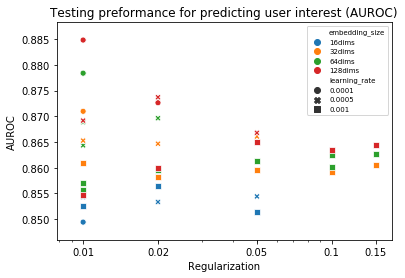

In [7]:
plot(y='auroc1', predict='user interest')

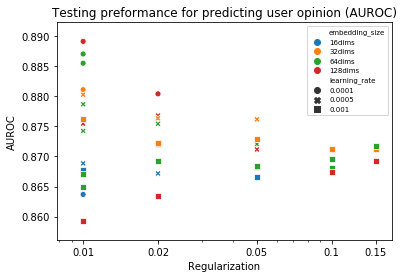

In [8]:
plot(y='auroc2', predict='user opinion')

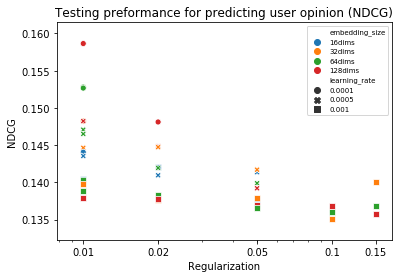

In [9]:
plot(y='ndcg2', predict='user opinion')

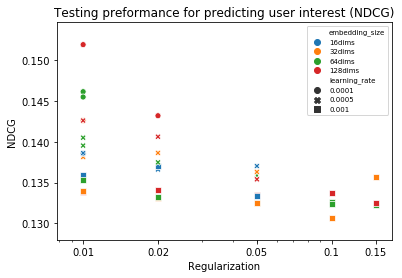

In [10]:
plot(y='ndcg1', predict='user interest')